# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.metrics import pairwise_distances


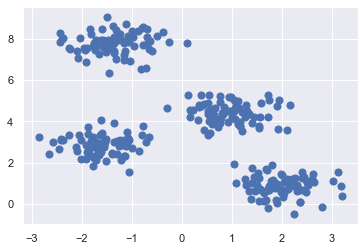

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

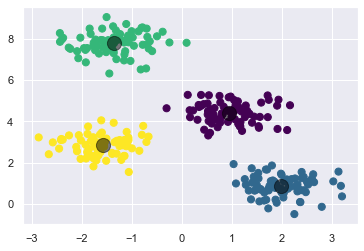

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
import random

In [6]:
class MyKMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        
    
    def init_centers(self, X):
        centroids = []
        if self.method == 'random':

            centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
    
        if self.method == 'k-means++':
            n_row, n_col = X.shape
            centroids  = np.zeros((self.k, n_col))
            rand_index = np.random.choice(n_row)
            centroids[0] = X[rand_index]
            distances = pairwise_distances(X, [centroids[0]], metric = 'euclidean').flatten()

            for i in range(1, self.k):
                prob = distances ** 2
                rand_index = np.random.choice(n_row, size = 1, p = prob / np.sum(prob))
                centroids[i] = X[rand_index]
                if i == self.k - 1:
                    break
                distances_new = pairwise_distances(X, [centroids[i]], metric = 'euclidean').flatten()
                distances = np.min(np.vstack((distances, distances_new)), axis = 0)          
        
        return centroids

    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = np.array(self.expectation(X, self.centroids))
            new_centroids = np.array(self.maximization(X, clusters))
            if (np.all(new_centroids.all== self.centroids)): # fix me
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        dist = pairwise_distances(X, centroids, metric = 'euclidean')
        clusters = np.argmin(dist, axis = 1)
        return clusters
        

    def maximization(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            new_centroids.append(np.array(X[clusters == i].mean(axis = 0)))
        return new_centroids    
        
    def predict(self, X):
        
        return self.expectation(X, self.centroids)
    
    def predict_proba(self, X):
        y_proba = [[k*0 for k in range(self.k)]]*len(X)
        
        for point_index, x in enumerate(X):
            distances = np.linalg.norm(x - self.centroids, axis=1)
            distance_squares = pow(np.array(distances), -2)
            y_proba[point_index] = distance_squares / np.sum(distance_squares)
        
        return np.array(y_proba)
         

In [7]:
mykmeans = MyKMeans(k=4, method='k-means++')
mykmeans.fit(X)
probas = mykmeans.predict_proba(X)
y_kmeans = mykmeans.predict(X)

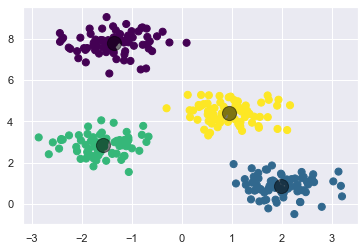

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);